# Assignment 3 (Part 2): Delayed Flights Prediction

<img src = 'https://img.jakpost.net/c/2018/08/07/2018_08_07_50869_1533633650._large.jpg'
     width = "550"/>

# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='' width="700" />

>- High level outline
>- Brief background section
>>- What is the problem?
>>- Why is it important?
>>- Who are the key stakeholders?

* [Go to Top](#table-of-content)

<b>High level outline:</b>
This is a prediction model for predicting delays in flights for a commercial airline.

<b>Brief background section</b>
scheduled_departure_time, carrier, destination, distance,
               origin, weather, day
               
The dataset has 2200 datapoints including the features as mentioned below:
- Scheduled departure time
- Carrier
- Destination
- Distance
- Origin
- Weather
- Day

> <b>What is the problem?</b><br>
This problem deals with predicting the delays in scheduled flights for a commercial airline. Prediction of such delays will ensure that there are no operational issues and will help streamline the flight scheduling.

> <b>Why is it important?</b><br>
As people are increasingly choosing to travel by air and with greater frequency, the number of flights that fail to take off on time has also increased. This increase in delays has worsened the crowded situation at airports and has caused financial difficulties within the airline industry. Air transportation delay indicates the lack of efficiency in the aviation system. It is a high cost to both airline companies and their passengers. According to the estimation by the Total Delay Impact Study, the total cost of air transportation delay to air travelers and the airline industry in 2007 was \\$32.9 billion in the US, resulting in a \\$4 billion reduction in GDP. The chart below shows how the cost per minute of delay is increasing every year. 

<br>
<img src="http://wp-uploads-trefis.s3.amazonaws.com/articles/wp-content/uploads/2016/08/tab.png"
     width = "700"/>
<br>
From this chart, we can see that the per minute cost of delay is majorly on account of Fuel and Oil, Crew, and Maintenance.
<br>

Delays affect both passengers and air carriers. Increased travel time and increased expenses on food and lodging cause stress among passengers. Further, delays disrupt the purpose of air travel — rapid, affordable and safe — and make the passengers distrust airlines. On the other hand, airlines suffer from extra crew costs, costs associated with accommodating disrupted passengers, and aircraft re-positioning, as airline fleet and crew schedules are largely based on the scheduled times.

In addition to the costs borne by passengers and airlines, there may be an indirect circular impact on the rest of the economy. As airline costs increase, they charge passengers a higher fare, affecting leisure travels and those industries which rely on air transportation for their business. This indirect impact then results in spillover on the rest of the economy, snowballing the already high costs of airlines.
Therefore, predicting flight delays can improve airline operations and passenger satisfaction, which will result in a positive impact on the economy. 

Delay of the flight can be dependent upon various features like shceduled departure time, carrier information, weather condition etc. We can use dataset containing these features to predict the flight delays.
<br>
<br>
<img src="https://d3i71xaburhd42.cloudfront.net/29e2a5a6b72d6738c6feb41ee0f8a9b57f600e7d/7-Figure3-1.png"
     width = "550"/>

<img src="http://scientistseeksdata.weebly.com/uploads/4/0/1/1/40118629/7404805_orig.png"
     width = "700"/>
     
From this, we can see that in the United States, on average, around 20% of the flights get delayed. Based on the high number of flights that run on a daily basis, 20% amounts to a very large number of delayed flights. 
Also, the reasons for the delay is as mentioned below:

|          Reason            |      %      |
|----------------------------|-------------|
|    Late aircraft delay     |    38.2%    |
|       NAS delay            |    29.5%    |
|      Carrier delay         |    28.9%    |
|      Weather delay         |    3.20%    |
|      Security delay        |    0.20%    |

> <b>Who are the key stakeholders?</b><br>
Accurately predicting flight delays will help commercial airlines and passengers (indirectly). Airlines will be able to anticipate and plan for predicted delays. Passengers also stand to indirectly benefit from such prediction, as they will not have to waste time at the airport, but can instead come to the airport directly in time for the flight.


* [Go to Top](#table-of-content)


# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test, initial_th, final_th, interval):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    TP_per = []
    TN_per = []
    FP_per = []
    FN_per = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(initial_th,final_th + interval,interval).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP_value = metrics.confusion_matrix(y_test, y_test_pred_class)[1,1]
        TN_value = metrics.confusion_matrix(y_test, y_test_pred_class)[0,0]
        FP_value = metrics.confusion_matrix(y_test, y_test_pred_class)[0,1]
        FN_value = metrics.confusion_matrix(y_test, y_test_pred_class)[1,0]
        TP.append(TP_value)
        TN.append(TN_value)
        FP.append(FP_value)
        FN.append(FN_value)
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))
        TP_per.append(TP_value/(len(y_test)-1)*100)
        TN_per.append(TN_value/(len(y_test)-1)*100)
        FP_per.append(FP_value/(len(y_test)-1)*100)
        FN_per.append(FN_value/(len(y_test)-1)*100)

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "TP%": TP_per,
                           "TN%": TN_per,
                           "FP%": FP_per,
                           "FN%": FN_per,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1": F1
                          })

    # Let's look at our dataframe
    return result

def summaryStats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             missing_vals = X[feature_list].isnull().sum(),
                  potential_outlier = np.where( (X[feature_list].skew() > 3) | (X[feature_list].skew() < - 3) | (X[feature_list].kurt() > 10) | (X[feature_list].kurt() < -10),
                                                      True,False)
                            ))
    return temp

# 3. Data Preparation <a class="anchor" id="data-prep"></a>
    
* [1. Initial Data Evaluation](#data-evaluation)
* [2. Data Duplicates](#data-duplicates)
* [3. Explore the data and find outliers and missing values](#data-exploration)
* [4. Feature Selection](#feature-selection)
* [5. Data Partitioning](#data-partitioning)
* [6. Data Normalization](#normalization)
<br>

* [Go to Top](#table-of-content)

### 3.1 Initial Data Evaluation<a class="anchor" id="data-evaluation"></a>
>- First of all, we will read the .csv file into a dataFrame
>- We will read the tail of the data so that we will get some idea about number of records.
>- After that we try to make sence of the columns
>- Now we can spot the target variable
>- Finally we can predict which variables should be strongly corelated to target variable by first impression

In [2]:
df = pd.read_csv('FlightDelays_Clean.csv')
df.tail()

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2196,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,1,0,0,0
2197,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,1,0,0
2198,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,1,0
2199,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,0,1
2200,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,1,0,0,0,0,0,0


In [3]:
print(df.shape)

(2201, 23)


In [4]:
print(df.dtypes)

status_delayed           int64
sch_dep_time           float64
carrier_delta            int64
carrier_us               int64
carrier_envoy            int64
carrier_continental      int64
carrier_discovery        int64
carrier_other            int64
dest_jfk                 int64
dest_ewr                 int64
dest_lga                 int64
distance                 int64
origin_dca               int64
origin_iad               int64
origin_bwi               int64
bad_weather              int64
Monday                   int64
Tuesday                  int64
Wednesday                int64
Thursday                 int64
Friday                   int64
Saturday                 int64
Sunday                   int64
dtype: object


**Obeservations:**

>- Dataset has around 2200 records. This means as the dataset is not very large so we might want to hold back while cleaning the data. By initial look it looks like the data is already cleaned up 
>- The column names are pretty self explainatory and we dont need to modify any of them. Out of the 23 columns 2 are continuous and and rest are binary. 
>- It looks like following categorical variables are converted to binary
| Categorical Variable | Possible values                                   |
|----------------------|---------------------------------------------------|
| Carrier              | Delta, US, Envoy, Continental, Discovery, Others  |
| Destination          | JFK, EWR, LGA                                     |
| Origin               | DCA, IAD, BWI                                     |
| Day                  | Mon, Tue, Wed, Thu, Fri, Sat, Sun                 |
>- status_delayed is the obvious target variable. Value 1 signifies its delayed and 0 signifies that its on time.

>[Go to Data Prep Outline](#data-prep)

### 3.2 Data duplicates<a class="anchor" id="data-duplicates"></a>

>- Find and remove all the duplicate records
>- Use the inplace = True to change the existing dataFrame

We are not focusing on dupes in this model so we are not dropping it.
>[Go to Data Prep Outline](#data-prep)

### 3.3 Explore the data<a class="anchor" id="data-exploration"></a>

>- Describe the data
>- Find datatype 
>- Find missing values
>- Find the outliers
>- Decide the Naive Baseline

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status_delayed,2201.00,0.19,0.40,0.00,0.00,0.00,0.00,1.00
sch_dep_time,2201.00,13.86,4.32,6.00,10.00,14.92,17.17,21.50
carrier_delta,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
carrier_us,2201.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00
carrier_envoy,2201.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
carrier_continental,2201.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00
carrier_discovery,2201.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00
carrier_other,2201.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
dest_jfk,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
dest_ewr,2201.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00


In [6]:
numerical_vars = ['sch_dep_time','distance']

summaryStats(df, numerical_vars)

,mean,median,std_dev,min_val,max_val,missing_vals,potential_outlier
sch_dep_time,13.86,14.92,4.32,6.00,21.50,0,False
distance,211.87,214.00,13.32,169.00,229.00,0,False


In [7]:
df.dtypes

status_delayed           int64
sch_dep_time           float64
carrier_delta            int64
carrier_us               int64
carrier_envoy            int64
carrier_continental      int64
carrier_discovery        int64
carrier_other            int64
dest_jfk                 int64
dest_ewr                 int64
dest_lga                 int64
distance                 int64
origin_dca               int64
origin_iad               int64
origin_bwi               int64
bad_weather              int64
Monday                   int64
Tuesday                  int64
Wednesday                int64
Thursday                 int64
Friday                   int64
Saturday                 int64
Sunday                   int64
dtype: object

In [8]:
print(len(df[df['status_delayed'] == 0])/len(df))

0.805542935029532


**Observatios:**
>- All the datatypes look appropriate according to the column name.
>- No column has null values
>- There are no potential outliers
>- If all the flights are predicted to be on time then the prediction would be accurate 80% of the time.

>[Go to Data Prep Outline](#data-prep)

### 3.4 Feature Selection<a class="anchor" id="feature-selection"></a>

>- Currently we have less number of predictor variables so we can consider all of them 

>[Go to Data Prep Outline](#data-prep)

### 3.5 Data Partitioning<a class="anchor" id="data-partitioning"></a>

>- Put all potential predictor variables into new object called 'X'
>- Put target variable in new object called 'y'
>- Partition data into training set and testing set

>[Go to Data Prep Outline](#data-prep)

In [9]:
target = ['status_delayed']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4,random_state=4)

### 3.6 Data Normalization<a class="anchor" id="normalization"></a>

>- We do this AFTER splitting the data because we only want to use summary stats<br>
>- from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

>[Go to Data Prep Outline](#data-prep)

In [10]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

In [11]:
features_means

sch_dep_time           13.83
carrier_delta           0.18
carrier_us              0.18
carrier_envoy           0.14
carrier_continental     0.04
carrier_discovery       0.25
carrier_other           0.21
dest_jfk                0.18
dest_ewr                0.30
dest_lga                0.53
distance              212.06
origin_dca              0.62
origin_iad              0.31
origin_bwi              0.06
bad_weather             0.02
Monday                  0.14
Tuesday                 0.15
Wednesday               0.17
Thursday                0.18
Friday                  0.12
Saturday                0.11
Sunday                  0.14
dtype: float64

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#kNN)
- [X] [Logistic Model](#lr-model)
- [X] [Decision Point](#decision-point)
- [x] [Performance Evaluation](#model-performance)


* [Go to Top](#table-of-content)

### 4.1 kNN<a class="anchor" id="kNN"></a>

>- Fit numerous kNN models using different values for k. <br>
>- Choose the "best" value for "k" based on Accuracy

In [12]:
# 1. train a classifier for different values of k
results = []
for k in np.arange(1,47,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class),
                    'precision':metrics.precision_score(y_test,y_pred_class),
                    'recall':metrics.recall_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy,precision,recall
0,1,0.75,0.34,0.31
1,3,0.78,0.41,0.24
2,5,0.78,0.38,0.17
3,7,0.79,0.39,0.14
4,9,0.80,0.44,0.09
5,11,0.81,0.52,0.10
6,13,0.82,0.71,0.10
7,15,0.82,0.76,0.09
8,17,0.82,0.92,0.07
9,19,0.81,1.00,0.05


<AxesSubplot:xlabel='k', ylabel='accuracy'>

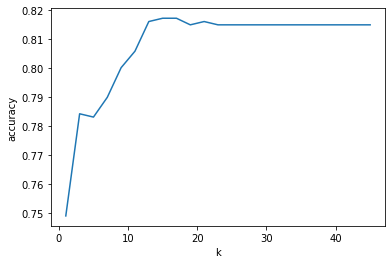

In [13]:
sns.lineplot(data=results_df, x='k',y='accuracy')

>**Decision:**<br>
>- Based on the results above, I will set my number of neighbors (k) to 9 as this is the lowest value that achieves the highest accuracy value
>- We can see we are getting more accuracy at k>=20, but we dont want invest so much computing power for just 1% of accuracy. Incase of k=21, for testing very point we will have to check the distance of test data from more than double number of data points than in case when k=9
>- Apart from accuracy, recall for k>=20 is very less than that of k=9<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.83
Testing data Accuracy: 0.8


In [15]:
class_perf_measures(knn, X_test, y_test,0,1,0.1)

,threshold,TP,TN,FP,FN,TP%,TN%,FP%,FN%,Precision,Recall,Accuracy,F1
0,0.00,172,0,709,0,19.55,0.00,80.57,0.00,0.20,1.00,0.20,0.33
1,0.10,157,189,520,15,17.84,21.48,59.09,1.70,0.23,0.91,0.39,0.37
2,0.20,115,364,345,57,13.07,41.36,39.20,6.48,0.25,0.67,0.54,0.36
3,0.30,73,553,156,99,8.30,62.84,17.73,11.25,0.32,0.42,0.71,0.36
4,0.40,33,662,47,139,3.75,75.23,5.34,15.80,0.41,0.19,0.79,0.26
5,0.50,16,689,20,156,1.82,78.30,2.27,17.73,0.44,0.09,0.80,0.15
6,0.60,10,708,1,162,1.14,80.45,0.11,18.41,0.91,0.06,0.81,0.11
7,0.70,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
8,0.80,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
9,0.90,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10


**Terminology:**
>- TP: Flight is delayed and it is predicted that it is delayed
>- TN: Flight is on time and it is predicted that it is on time
>- FP: Flight is on time but it is predicted that it is delayed 
>- FN: Flight is delayed but it is predicted that it is on time

* [Go to Machine Learning Model](#ml-model)

### 4.2 Logistic Model<a class="anchor" id="lr-model"></a>

>- Let's produce the same table above but this time using a Logistic Model

In [16]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.82
Testing data Accuracy: 0.81


In [17]:
class_perf_measures(lr_model, X_test, y_test,0,1,0.1)

C:\Users\kchapork\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,TP%,TN%,FP%,FN%,Precision,Recall,Accuracy,F1
0,0.00,172,0,709,0,19.55,0.00,80.57,0.00,0.20,1.00,0.20,0.33
1,0.10,159,163,546,13,18.07,18.52,62.05,1.48,0.23,0.92,0.37,0.36
2,0.20,107,457,252,65,12.16,51.93,28.64,7.39,0.30,0.62,0.64,0.40
3,0.30,53,654,55,119,6.02,74.32,6.25,13.52,0.49,0.31,0.80,0.38
4,0.40,12,701,8,160,1.36,79.66,0.91,18.18,0.60,0.07,0.81,0.12
5,0.50,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
6,0.60,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
7,0.70,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
8,0.80,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
9,0.90,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10


**Terminology:**
>- TP: Flight is delayed and it is predicted that it is delayed
>- TN: Flight is on time and it is predicted that it is on time
>- FP: Flight is on time but it is predicted that it is delayed 
>- FN: Flight is delayed but it is predicted that it is on time

* [Go to Machine Learning Model](#ml-model)

### 4.3 Decision Point<a class="anchor" id="decision-point"></a>

AUC is more for our Logistic Model and kNN. For now I will use Logistic model to further evaluate probability thresholds and corresponding performance measures

* [Go to Machine Learning Model](#ml-model)

C:\Users\kchapork\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


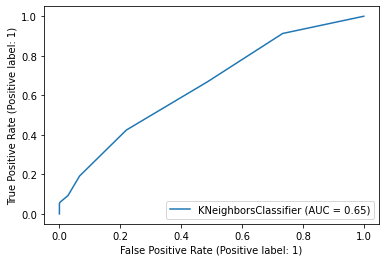

C:\Users\kchapork\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


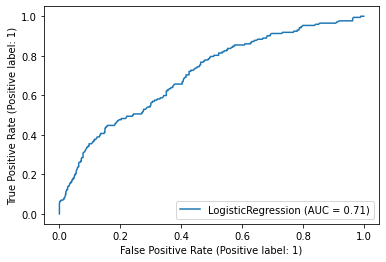

In [18]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

### 4.4 Model Performance<a class="anchor" id="model-performance"></a>

>- Let's chec the performance of the logistic model for different thresholds to find the best performing model

**Terminology:**
>- TP: Flight is delayed and it is predicted that it is delayed
>- TN: Flight is on time and it is predicted that it is on time
>- FP: Flight is on time but it is predicted that it is delayed 
>- FN: Flight is delayed but it is predicted that it is on time

**Assumptions**
>- Delay status is for the departure of flight. It is assumed as the scheduled departure time is given
>- Wether condition is of the flight origin location

**Analyzing possibilities**
>- 1. Effects of FP:<br> 
    i.   Need to create sufficinet airspace for aircraft when it departsnwhile managing flow of other flights.<br>
    ii.  Staff and Customers will arrive late and might miss the flight as they will assume the flight is delayed.<br>
    iii. Airline Company might have to delay the flight in reality and it might cost the docking area space or fuel cost.<br>
    iv.  Generally people are adviced to arrive 2-3 hours before the scheduled deprature time so there is a possibility that even though flight is predicted to be delayed by few minutes, customers will arrive on time. Thus, flight can take off on time <br>
    v.  Customer might sue the airline operator.<br><br>
>- 2. Effects of FN:<br>
    i.   Need to create sufficinet airspace for aircraft when it departsnwhile managing flow of other flights.<br>
    ii.  Staff and Customers will arrive early and will have to wait for the flight. <br>
    iii. Customers might miss the next connecting flights. In such cases<br>
    iv.  Customers might sue the airline operator.<br>

**Decision**   
>- Assuming the delay status is for the departure of the flight, the cost of FN is more than the cost of FP. We can solve the problems created by FP by delaying the flight by some time. But in case of FN we will have to face angry customers waiting at the airport and if the customer misses the next connecting flight then we might have to manage his/her booking in next flight and also manage lodging and dinning for the customer.
>- FN is the costly perameter. Thus we want to minimise the FN and maximise the recall. 

In [19]:
class_perf_measures(lr_model, X_test, y_test,0,1,0.1)

C:\Users\kchapork\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,TP%,TN%,FP%,FN%,Precision,Recall,Accuracy,F1
0,0.00,172,0,709,0,19.55,0.00,80.57,0.00,0.20,1.00,0.20,0.33
1,0.10,159,163,546,13,18.07,18.52,62.05,1.48,0.23,0.92,0.37,0.36
2,0.20,107,457,252,65,12.16,51.93,28.64,7.39,0.30,0.62,0.64,0.40
3,0.30,53,654,55,119,6.02,74.32,6.25,13.52,0.49,0.31,0.80,0.38
4,0.40,12,701,8,160,1.36,79.66,0.91,18.18,0.60,0.07,0.81,0.12
5,0.50,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
6,0.60,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
7,0.70,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
8,0.80,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10
9,0.90,9,709,0,163,1.02,80.57,0.00,18.52,1.00,0.05,0.81,0.10


**Observations**

>- We might want to look for the threshold between 0.1 and 0.3 as the recall is dropping suddenly between 0.1-0.2 threshold and 0.2-0.3 threshold

In [20]:
class_perf_measures(lr_model, X_test, y_test,0.1,0.2,0.01)

,threshold,TP,TN,FP,FN,TP%,TN%,FP%,FN%,Precision,Recall,Accuracy,F1
0,0.10,159,163,546,13,18.07,18.52,62.05,1.48,0.23,0.92,0.37,0.36
1,0.11,158,186,523,14,17.95,21.14,59.43,1.59,0.23,0.92,0.39,0.37
2,0.12,153,234,475,19,17.39,26.59,53.98,2.16,0.24,0.89,0.44,0.38
3,0.13,148,275,434,24,16.82,31.25,49.32,2.73,0.25,0.86,0.48,0.39
4,0.14,146,301,408,26,16.59,34.20,46.36,2.95,0.26,0.85,0.51,0.40
5,0.15,141,328,381,31,16.02,37.27,43.30,3.52,0.27,0.82,0.53,0.41
6,0.16,138,348,361,34,15.68,39.55,41.02,3.86,0.28,0.80,0.55,0.41
7,0.17,132,377,332,40,15.00,42.84,37.73,4.55,0.28,0.77,0.58,0.42
8,0.18,125,397,312,47,14.20,45.11,35.45,5.34,0.29,0.73,0.59,0.41
9,0.19,115,423,286,57,13.07,48.07,32.50,6.48,0.29,0.67,0.61,0.40


In [21]:
class_perf_measures(lr_model, X_test, y_test,0.2,0.3,0.01)

,threshold,TP,TN,FP,FN,TP%,TN%,FP%,FN%,Precision,Recall,Accuracy,F1
0,0.20,107,457,252,65,12.16,51.93,28.64,7.39,0.30,0.62,0.64,0.40
1,0.21,100,478,231,72,11.36,54.32,26.25,8.18,0.30,0.58,0.66,0.40
2,0.22,92,506,203,80,10.45,57.50,23.07,9.09,0.31,0.54,0.68,0.39
3,0.23,87,522,187,85,9.89,59.32,21.25,9.66,0.32,0.51,0.69,0.39
4,0.24,85,550,159,87,9.66,62.50,18.07,9.89,0.35,0.49,0.72,0.41
5,0.25,82,570,139,90,9.32,64.77,15.80,10.23,0.37,0.48,0.74,0.42
6,0.26,77,586,123,95,8.75,66.59,13.98,10.80,0.39,0.45,0.75,0.41
7,0.27,70,605,104,102,7.95,68.75,11.82,11.59,0.40,0.41,0.77,0.40
8,0.28,66,622,87,106,7.50,70.68,9.89,12.05,0.43,0.38,0.78,0.41
9,0.29,61,635,74,111,6.93,72.16,8.41,12.61,0.45,0.35,0.79,0.40


1. **Prob Threshold = 0.15**:

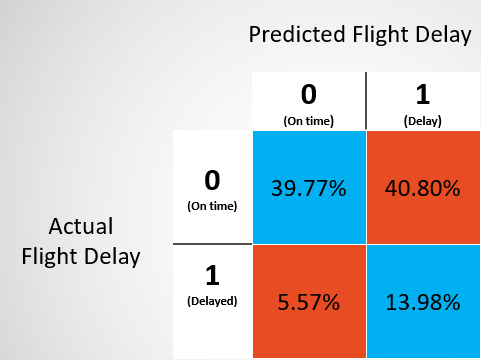


- Here threshold is 0.15 which means if probability of flight delay is more than 0.15 then we will predict that flight is delayed. As this threshold is very low we expect very high percentage of positive predictions and we can see p% = 14 + 40 = 54%
- we also see a lot of false positive (FP) - this makes sense given the low threshold
- In this case false positive means that flight is actually on time but it is predicted that it is delayed. Where as false negative means flight is predicted on time but is actually delayed.
- We have already discussed that FN are more costly than FP
- For 0.15 threshold, our model is predicting corectly for 54% of the times, for 5.57% times it is saying the flight is on time but in reality it is delayed and for 40% times it is saying that flight is delayed but actually it is on time.

- Here recall is very good but accuracy and FP% is very high. We will check other thresholds and decide the threshold later.

<br><br>

2. **Prob Threshold = 0.22**:

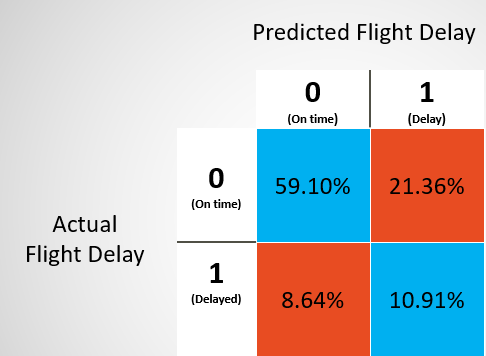

- Here threshold is 0.22 which means if probability of flight delay is more than 0.22 then we will predict that flight is delayed.
- Here recall is 0.56 which is 15% less than the recall for th = 0.15
- Even though recall is reduced drastically, the FN% is increased only by 3% making it 8.64%. It means that model will predict flight is on time even though it is delayed for 8% of the time.
- Increase of 3% in FN is resulting in reducing the FP% to half. for th = 0.15, FP% was around 40% where as for th=0.22 FP% = 21%. That is for 21% of the times, model will predict the flight is delayed when in reality it is on time. 
- This threshold look much better than the previous one because for the cost of 3% of FN, we are reducing FP by 20% and accuracy is also increased from 54% to 70% 
<br><br>

3. **Prob Threshold = 0.8**:

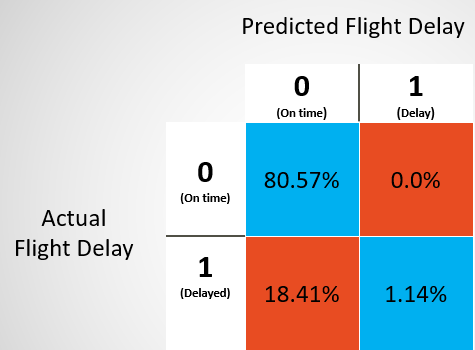

- Here threshold is 0.8 which means if probability of flight delay is more than 0.8 then we will predict that flight is delayed. As this threshold is very high we expect very high percentage of negative predictions and we can see N% = 80 + 18 = 98%
- For this threshold, FP% is 0 but FN% is 18%. 
- Threshold is giving very weak recall of 0.06 which is the performance parameter under focus.
- As the reacll is very low, this threshold is not accurate for our model.
<br><br>
4. **Best threshold**
    - Considering all the thresold, 0.22 looks like the best scenario. 
    - 70% of the time prediction will be correct.
    - 21% of the time, airline will have to purposefully delay the flight even if it can take off on time. This will happen when wether conditions are bad so model predicts that we will have to delay the flight. But suddenly the weather gets back to normal so flight can take of on time. As the flight is predicted to be delayed, so passangers will arrive on the delayed time. Thus airline will have to hold the flight for that duration. If the duration of delay is minutes and not in hours then it is possible that passangers are already present on the airport. So if the airstrip is available then flight can take off immediately.
    - 8% of the time, model predicts it is on time but in reality is it delayed. It will happen when weather is good but suddenly gets bad before take off or when reputed airline which generally is punctual gets delayed in reality. In such cases, airline will have to face customer dissatisfaction which might cause loss of future potential customers. If the customers have connecting flights then they might miss the flights because of the delay. In such case airline have to arrange next flights along with lodging and dinning for such customers. 
    
* [Go to Machine Learning Model](#ml-model)

# 5. Deployment <a class="anchor" id="model-deployment"></a>

* [Go to Top](#table-of-content)

In [22]:
import pickle
pickle_out = open('flightDealy', mode='wb')
pickle.dump([knn, lr_model, features_means, features_std, X_test.columns], pickle_out)
pickle_out.close()

In [23]:
%%writefile app.py

import pickle
import streamlit as st
import math
import pandas as pd
import numpy as np

pickle_in = open('flightDealy', 'rb')
knn, lr_model, features_means, features_std, features = pickle.load(pickle_in)

@st.cache()

# Define the function which will make the prediction using data
# inputs from users

def prediction(classifier, scheduled_departure_time, carrier, destination, distance,
               origin, weather, day):
    
    #initialization
    carriers = {'Delta':0,
                'US':0,
                'Envoy':0,
                'Continental':0,
                'Discovery':0,
                'Others':0}
    
    destinations = {'John F. Kennedy International Airport':0,
                    'Newark Liberty International Airport':0,
                    'LaGuardia Airport':0}
    
    origins = {'Ronald Reagan Washington National Airport':0,
                'Washington Dulles International Airport':0,
                'Baltimore/Washington International Thurgood Marshall Airport':0}
    
    days = {'Monday':0,
            'Tuesday':0,
            'Wednesday':0,
            'Thursday':0,
            'Friday':0,
            'Saturday':0,
            'Sunday':0}
               
    weather_list = {
        'Good':0,
        'Bad':1
    }    
    
    #value population
    for key in carriers:
        if key == carrier:
            carriers[key] = 1
            
    for key in destinations:
        if key == destination:
            destinations[key] = 1
            
    for key in origins:
        if key == origin:
            origins[key] = 1
               
    for key in days:
        if key == day:
            days[key] = 1
    
    X_test_df = pd.DataFrame([[scheduled_departure_time,
          carriers.get('Delta'),carriers.get('US'),carriers.get('Envoy'),carriers.get('Continental'),carriers.get('Discovery'),carriers.get('Others'),
          destinations.get('John F. Kennedy International Airport'),
          destinations.get('Newark Liberty International Airport'),
          destinations.get('LaGuardia Airport'),
          distance,
          origins.get('Ronald Reagan Washington National Airport'),
          origins.get('Washington Dulles International Airport'),
          origins.get('Baltimore/Washington International Thurgood Marshall Airport'),
          weather_list.get(weather),
          days.get('Monday'),days.get('Tuesday'),days.get('Wednesday'),days.get('Thursday'),days.get('Friday'),days.get('Saturday'),days.get('Sunday')
         ]], 
        columns=features)
    
    #normalise the test data
    X_test_df = (X_test_df - features_means)/features_std
    
    # Make predictions
    if classifier == 'Logistic Regression':
        prediction = lr_model.predict_proba(X_test_df)
        THRESHOLD = 0.22
    else: 
        prediction = knn.predict_proba(X_test_df)
        THRESHOLD = 0.2
    
    if prediction[0][1] > THRESHOLD:
        return 'Sorry the flight is delayed'
    else: 
        return 'Your flight is on time'

# This is the main function in which we define our webpage
def main():
    
    st.title('Jarvis Flight Delay Predictor')
    # Create input fields
    classifier = st.radio("Which model you want to use for prediction?",
                            ('kNN','Logistic Regression'))
    
    scheduled_departure_time = st.number_input("What is the scheduled time of departure?",
                                  min_value=0.00,
                                  max_value=24.00,
                                  value=12.50,
                                  step=0.50,
                                 )
               
    carrier = st.selectbox('Select the flight carrier',
                             ('Delta','US','Envoy','Continental','Discovery','Others'))
    
    destination = st.selectbox('Select the destination',
                             ('John F. Kennedy International Airport', 'Newark Liberty International Airport', 'LaGuardia Airport'))
    
    distance = st.number_input("What is the distance traveled",
                                  min_value=150,
                                  max_value=240,
                                  value=200,
                                  step=10,
                                 )
    
    origin = st.selectbox('Select the origin',
                             ('Ronald Reagan Washington National Airport','Washington Dulles International Airport','Baltimore/Washington International Thurgood Marshall Airport'))
    
    weather = st.selectbox('How is the weather',
                             ('Good','Bad'))
               
    day = st.selectbox('Select the day of flight',
                             ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
               
    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Is the flight delayed?"):
        result = prediction(classifier, scheduled_departure_time, carrier, destination, distance,
               origin, weather, day)
        st.success(result)
        
if __name__=='__main__':
    main()

Overwriting app.py


In [ ]:
!streamlit run app.py